In [1]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import matplotlib.colors as mcolors

In [2]:
MET_res="/home/cap/Downloads/MET_RESULTS"
cmap_custom = mcolors.ListedColormap(['blue',"white", 'red'])  # Define a custom colormap with two colors

ncfile = "grid_stat_000000L_20150501_000000V_pairs.nc"
nf = os.path.join(MET_res,ncfile)
dataset = xr.open_dataset(nf)
var = "FCST_FSNOWC_Z0_FULL_ge1"

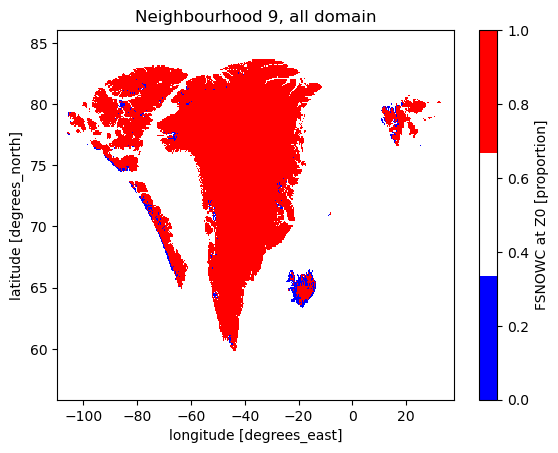

In [3]:
dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
variable = dataset[var]
plt.title('Neighbourhood 9, all domain')
plt.show()

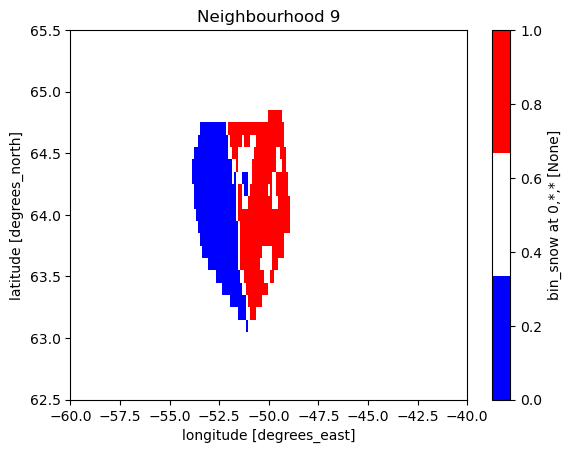

In [9]:
#var = "DIFF_FSNOWC_Z0_FSNOWC_Z0_GREENLAND_WEST_SECTION"
var = 'FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION_ge1_NBRHD_9'
var = 'OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION_ge1_NBRHD_9'
var = 'OBS_bin_snow_0_all_all_NUUK_ge1_NBRHD_9'

# Define the range of latitude and longitude for the region you want to zoom in
#West Greenland

lat_min, lat_max = 67,72 #  62,67
lon_min, lon_max = -55,-47.5

# Nuuk
lat_min, lat_max = 62.5,65.5 #  62,67
lon_min, lon_max = -60,-40

dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('Neighbourhood 9')
plt.show()

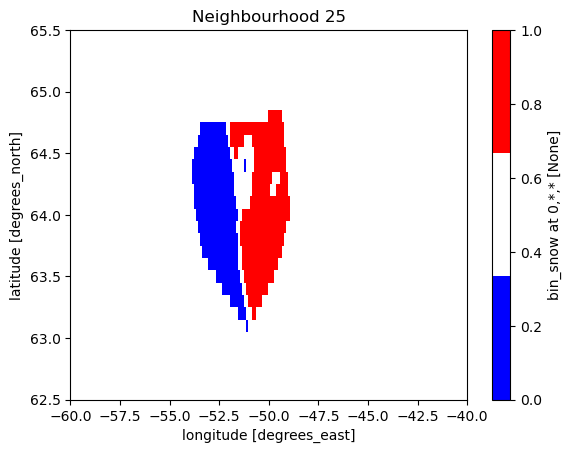

In [10]:
var = 'FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION_ge1_NBRHD_25'
var = 'OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION_ge1_NBRHD_25'
var = 'OBS_bin_snow_0_all_all_NUUK_ge1_NBRHD_25'


dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('Neighbourhood 25')
plt.show()

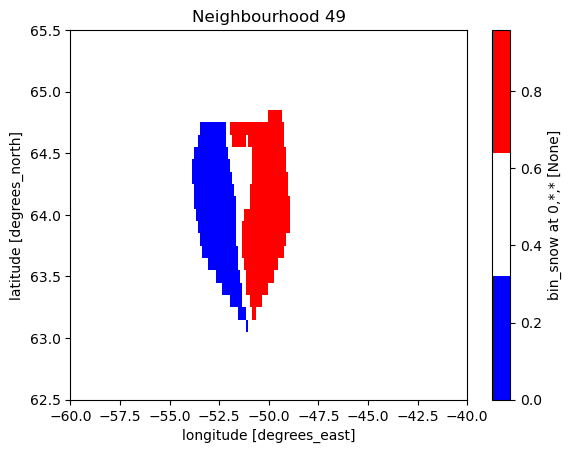

In [11]:
var = 'FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION_ge1_NBRHD_49'
var = 'OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION_ge1_NBRHD_49'
var = 'OBS_bin_snow_0_all_all_NUUK_ge1_NBRHD_49'

dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('Neighbourhood 49')
plt.show()

In [12]:
#dataset[var]

In [13]:
not_nan_points = dataset[var].notnull()


### Select the points where there is data defined, so the map is more clearly visible

In [14]:
#not_nan_coords = dataset[var].coords[not_nan_points]
not_nan_coords = dataset[var].where(not_nan_points, drop=True)


In [15]:
lat = not_nan_coords['lat']
lon = not_nan_coords['lon']

# Select points in dataset[var] with lat and lon coordinates from not_nan_coords
selected_points = dataset[var].sel(lat=lat, lon=lon)

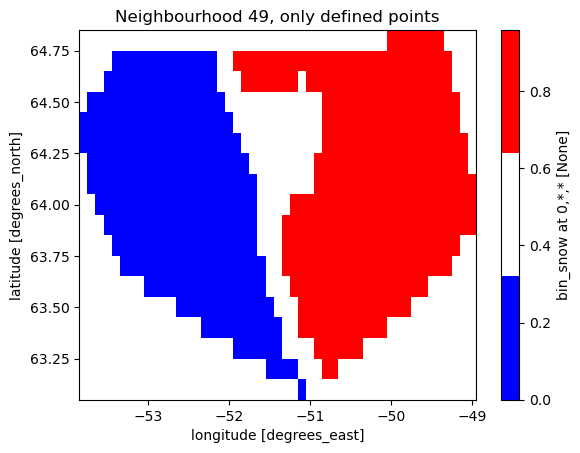

In [16]:
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 49, only defined points')
plt.show()

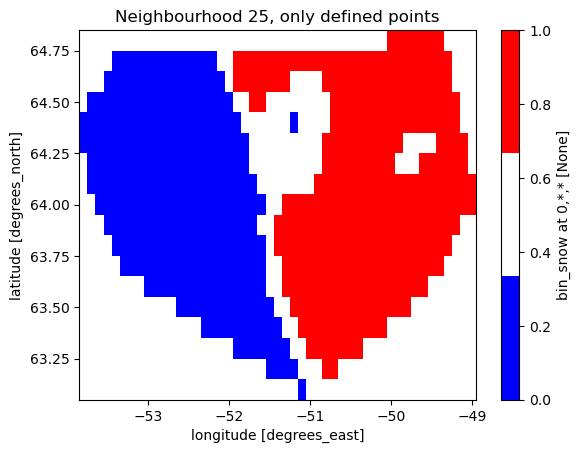

In [18]:
var = "OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION_ge1_NBRHD_25"
var = "OBS_bin_snow_0_all_all_NUUK_ge1_NBRHD_25"

selected_points = dataset[var].sel(lat=lat, lon=lon)
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 25, only defined points')
plt.show()

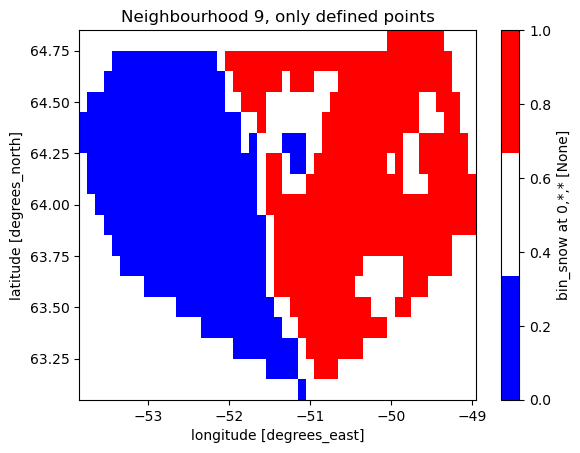

In [19]:
var = "OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION_ge1_NBRHD_9"
var = "OBS_bin_snow_0_all_all_NUUK_ge1_NBRHD_9"

selected_points = dataset[var].sel(lat=lat, lon=lon)
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 9, only defined points')
plt.show()

### Forecast data below

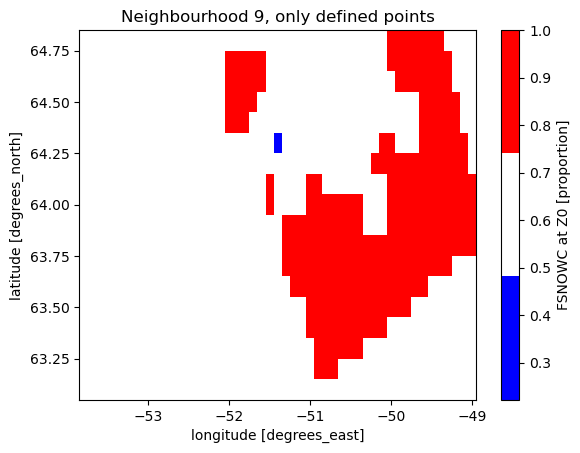

In [20]:
var = "FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION_ge1_NBRHD_9"
var = "FCST_FSNOWC_Z0_NUUK_ge1_NBRHD_9"

selected_points = dataset[var].sel(lat=lat, lon=lon)
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 9, only defined points')
plt.show()

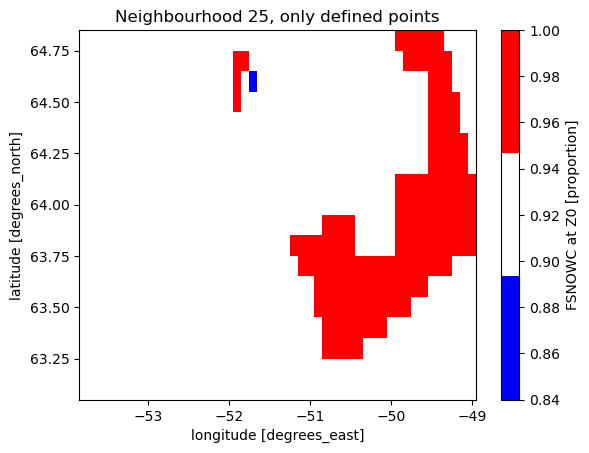

In [21]:
var = "FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION_ge1_NBRHD_25"
var = "FCST_FSNOWC_Z0_NUUK_ge1_NBRHD_25"

selected_points = dataset[var].sel(lat=lat, lon=lon)
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 25, only defined points')
plt.show()